In [19]:
import pandas as pd
data = pd.read_csv("../data/processed_data.csv")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

Use Feature Importance (Random Forest / XGBoost feature importance scores) to
rank variables.

In [20]:
X=data.drop('target',axis=1)
y=data['target']

X=X.replace('?',np.nan)
X=X.apply(pd.to_numeric,errors='coerce')
X=X.fillna(X.mean())


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
importances=model.feature_importances_
features=X.columns
rank=pd.Series(importances,index=features).sort_values(ascending=False)
print(rank)

thalach     0.135485
chol        0.126809
age         0.116245
oldpeak     0.114091
ca          0.106275
trestbps    0.105638
thal        0.075931
cp          0.067564
exang       0.045160
slope       0.034991
sex         0.028953
restecg     0.025457
fbs         0.017401
dtype: float64


Apply Recursive Feature Elimination (RFE) to select the best predictors.

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier(random_state=42)
FeaturesToSelect=8
select=RFE(model,n_features_to_select=FeaturesToSelect)
select=select.fit(X_train,y_train)
SelectedFeature=X.columns[select.support_]
print("Selected Features:",list(SelectedFeature))

Selected Features: ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']


Use Chi-Square Test to check feature significance

In [22]:
F=8
X=X.abs()
select=SelectKBest(score_func=chi2,k=F)
X_new=select.fit_transform(X, y)
scores=select.scores_
feature_scores=list(zip(X.columns, scores))
sorted_features=sorted(feature_scores,key=lambda x:x[1],reverse=True)
for feature, score in sorted_features:
    print(f"{feature}:{score}")

thalach:219.88355659232295
ca:107.21355311355303
oldpeak:98.50552313475987
thal:70.52028293770243
exang:39.119181913447306
chol:38.16745158529203
age:27.97523271260713
trestbps:19.34808999452853
cp:16.38318047224615
restecg:13.026433722527388
slope:10.178420791393398
sex:7.5116460964408045
fbs:6.778461219013555


Select only the most relevant features for modeling

In [23]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
F=8
select=SelectKBest(score_func=chi2,k=F)
X_new=select.fit_transform(X_scaled, y)
selected_columns = X.columns[select.get_support()]
X_selected=pd.DataFrame(X_new,columns=selected_columns)
print(selected_columns.tolist())

['sex', 'cp', 'fbs', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


Visualization

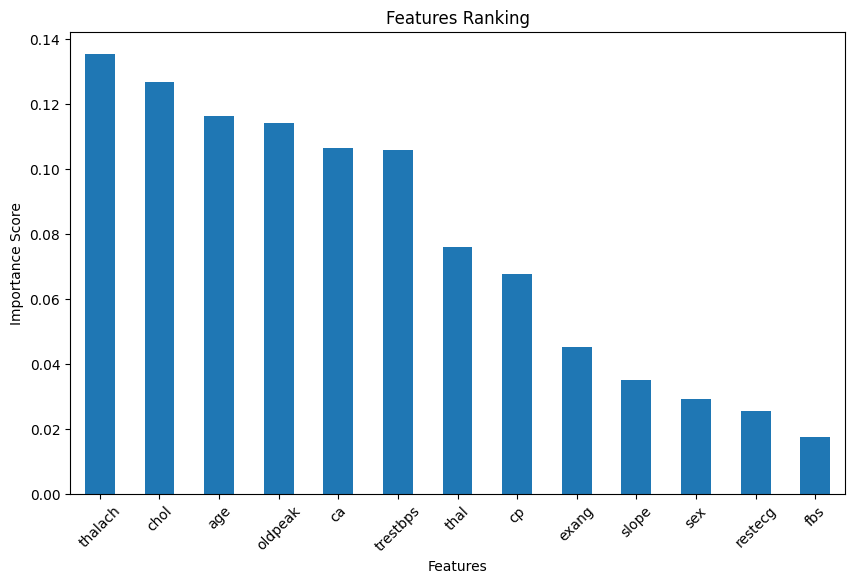

In [24]:
plt.figure(figsize=(10,6))
rank.plot(kind='bar')
plt.title('Features Ranking')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()
